In [1]:
import numpy as np
from astropy import units as u
import astropy
import matplotlib.pyplot as plt

source_ida = 2146576589564898688
source_idb = 2146576757065535360
ma = (0.518, 0.066)
mb = (0.346+0.331, 0.04)
from astroquery.gaia import Gaia
import warnings
warnings.filterwarnings("ignore")
# Get RA/Dec of components:
job = Gaia.launch_job("SELECT * FROM gaiadr2.gaia_source WHERE source_id = "+str(source_ida))
j = job.get_results()
job = Gaia.launch_job("SELECT * FROM gaiadr2.gaia_source WHERE source_id = "+str(source_idb))
k = job.get_results()
# Take weighted average to get location of COM:
alpha = (j['ra']*ma[0]+k['ra']*mb[0])/(ma[0]+mb[0])
delta = (j['dec']*ma[0]+k['dec']*mb[0])/(ma[0]+mb[0])
alpha = float(alpha) * np.pi/180.
delta = float(delta) * np.pi/180.
# values from orbit fit:
filename = 'accepted_0'
af = astropy.io.ascii.read(filename)
#print(alpha)
#print(delta)
i = np.radians(af['incl[deg]'])
O = np.radians(af['posangleofnodes[deg]'])


Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
littlem = np.sqrt(np.cos(i)**2 + np.sin(i)**2 * np.sin(O)**2)
bigM = np.arctan2(np.sin(i) * np.sin(O), np.cos(i))
D = np.arcsin(littlem * np.sin(bigM + delta))
sinalphaminusa = np.sin(i) * np.cos(O) / np.cos(D)
cosalphaminusa = littlem * np.cos(bigM + delta) / np.cos(D)
alphaminusa = np.arctan2(sinalphaminusa,cosalphaminusa)#have to use arctan2 to get the right quadrant
A = alpha - alphaminusa
  


In [3]:
A = A * 180./np.pi
D = D * 180./np.pi
  
A = (A + 180.) % 360.# flip from left-hand rule (from Chang) to right-hand rule
D = D * (-1.)



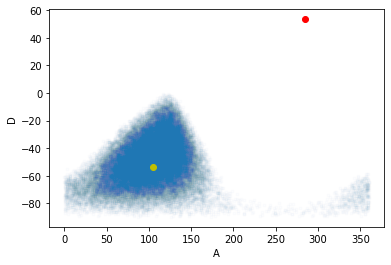

In [6]:
plt.plot(A,D,'.',alpha=.01)
plt.plot(alpha * 180/np.pi, delta * 180/np.pi, 'or')# Location of the system
plt.plot((alpha * 180/np.pi + 180) % 360, delta * 180/np.pi * -1, 'oy')# 180 degrees from the location of the system
# the pole is centered on 180 degrees from the location of the system
#so this looks right for a roughly face-on orbit
plt.xlabel('A')
plt.ylabel('D')
plt.show()

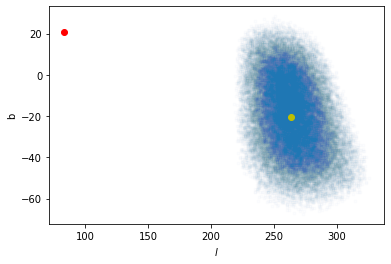

In [12]:
from astropy.coordinates import SkyCoord
pole = SkyCoord(A*u.deg, D*u.deg, frame='icrs')
#print(pole)
plt.plot(pole.galactic.l, pole.galactic.b, '.',alpha=.01)
pos = SkyCoord(alpha* 180/np.pi*u.deg, delta* 180/np.pi*u.deg, frame='icrs')
plt.plot(pos.galactic.l, pos.galactic.b, 'ro')
pos = SkyCoord((alpha * 180/np.pi + 180) % 360*u.deg, delta * 180/np.pi * -1*u.deg, frame='icrs')
plt.plot(pos.galactic.l, pos.galactic.b, 'yo') #180 degrees from the system
plt.xlabel(r'$l$')
plt.ylabel('b')
plt.show()

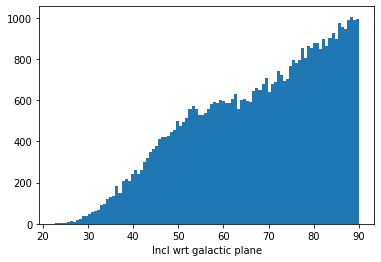

In [14]:
inclinationgalplane = 90 - np.abs(np.array(pole.galactic.b))
j=plt.hist(inclinationgalplane, 100) #So the inclination with respect to the galactic plane is likely high
plt.xlabel('Incl wrt galactic plane')
plt.show()